In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
x_train = pd.read_csv('dos_inputtrain - Copy.csv',low_memory=False)

x_test = pd.read_csv('dos_inputtest - Copy.csv')


In [3]:
label_train = pd.read_csv('label_train.csv')

In [4]:
label_test = pd.read_csv('label_test.csv') 

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df_train_object=x_train.loc[:, x_train.dtypes == np.object]
df_test_object=x_test.loc[:, x_test.dtypes == np.object]

In [7]:
cl = df_test_object.columns

In [8]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
le = LabelEncoder()
# create a list of categorical columns to iterate over
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cl:
    encode(x_train[columns])
for columns in cl:
    encode(x_test[columns])

C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  il

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
Xtrain_std = sc.fit_transform(x_train)
Xtest_std = sc.transform(x_test)

In [10]:
from sklearn import decomposition
# Create a pca object with the 6 components as a parameter
pca = decomposition.PCA(n_components=40)

# Fit the PCA and transform the data
Xtrain_std_pca = pca.fit_transform(Xtrain_std)
Xtest_std_pca = pca.fit_transform(Xtest_std)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(Xtrain_std_pca,label_train, test_size=0.2,random_state=0)

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import SGD

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\keras\__init__.py", line 3, in <module>
    from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental.preprocessing'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-88e269fa2e81>", line 1, in <module>
    import keras
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\keras\__init__.py", line 6, in <module>
    'Keras requires TensorFlow 2.2 or higher. '
ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\a

In [ ]:
model = Sequential([
    Dense(30, activation='relu', input_shape=(40,)),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid'),
])
epochs = 100
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-e80b1b3edaba>", line 1, in <module>
    model = Sequential([
NameError: name 'Sequential' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\co

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=epochs,
          validation_data=(X_val, Y_val))

Train on 203552 samples, validate on 50889 samples
Epoch 1/100
203552/203552 [==============================] - 79s 387us/sample - loss: 0.5009 - acc: 0.7510 - val_loss: 0.4754 - val_acc: 0.7656
Epoch 2/100
203552/203552 [==============================] - 77s 380us/sample - loss: 0.4671 - acc: 0.7697 - val_loss: 0.4626 - val_acc: 0.7698loss: 0.4671 - acc:
Epoch 3/100
203552/203552 [==============================] - 76s 373us/sample - loss: 0.4557 - acc: 0.7761 - val_loss: 0.4518 - val_acc: 0.7773
Epoch 4/100
203552/203552 [==============================] - 79s 388us/sample - loss: 0.4477 - acc: 0.7801 - val_loss: 0.4469 - val_acc: 0.7830
Epoch 5/100
203552/203552 [==============================] - 78s 381us/sample - loss: 0.4416 - acc: 0.7833 - val_loss: 0.4398 - val_acc: 0.7841
Epoch 6/100
203552/203552 [==============================] - 77s 378us/sample - loss: 0.4369 - acc: 0.7861 - val_loss: 0.4336 - val_acc: 0.7898
Epoch 7/100
203552/203552 [==============================] - 78s 3

203552/203552 [==============================] - 25s 123us/sample - loss: 0.3712 - acc: 0.8325 - val_loss: 0.3689 - val_acc: 0.8322
Epoch 58/100
203552/203552 [==============================] - 25s 121us/sample - loss: 0.3704 - acc: 0.8328 - val_loss: 0.3730 - val_acc: 0.8311
Epoch 59/100
203552/203552 [==============================] - 26s 127us/sample - loss: 0.3699 - acc: 0.8337 - val_loss: 0.3737 - val_acc: 0.8297
Epoch 60/100
 52544/203552 [======>.......................] - ETA: 16s - loss: 0.3664 - acc: 0.8352

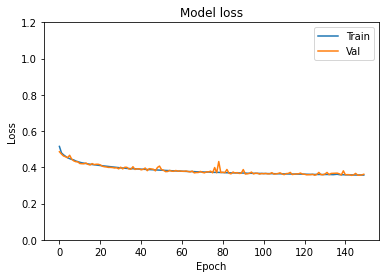

In [56]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-070d989ccadb>", line 1, in <module>
    plt.plot(hist.history['accuracy'])
KeyError: 'accuracy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\anaconda\envs\tf_GPU\lib\site-packages\IPython\core\ultratb

In [57]:
model.save('PCA.h5')
import tensorflow as tf 
new_model = tf.keras.models.load_model('PCA.h5')

ERROR! Session/line number was not unique in database. History logging moved to new session 103
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [58]:
yout = model.predict_classes(Xtest_std_pca)

In [26]:
yout

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [24]:
label_test

label_test
0               0
1               0
2               0
3               0
4               0
...           ...
32720           1
32721           1
32722           1
32723           1
32724           1

[32725 rows x 1 columns]

In [28]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(yout,label_test ))

accuracy =  0.49989304812834223
